# 1.3) 국가별 음주 데이터 분석하기

### 바로가기

- [<Step1. 탐색> 데이터의 기초 정보 살펴보기](#<Step1.-탐색>-데이터의-기초-정보-살펴보기)
    - [drinks 데이터셋의 기본 정보]
- [<Step2. 인사이트의 발견> : 탐색과 시각화](#<Step2.-인사이트의-발견>-:-탐색과-시각화)
    - [피처간의 상관관계 탐색]
        - [두 피처간의 상관계수 구하기]
        - [여러 피처의 상관관계 분석]
    - [가장 많이 주문한 item]
    - [주문된 item의 개수]
    - [item당 주문 개수와 총량]
- [<Step3. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색](#<Step3.-탐색적-분석>-:-스무고개로-분석하는-개념적-탐색)
    - [결측 데이터 전처리]
    - [그룹 단위의 데이터 분석 : 대륙별 분석]
    - [그룹 단위의 데이터 분석 : 의미를 가지는 피처 재구성하기]
- [<Step4. 통계적 분석> : 분석 대상간의 통계적 차이 검정하기](#<Step4.-통계적-분석>-:-분석-대상간의-통계적-차이-검정하기)
    - [아프리카와 유럽간의 술 소비량 차이 검정하기]
- [대한민국은 얼마나 술을 독하게 마시는 나라일까?](#대한민국은-얼마나-술을-독하게-마시는-나라일까?)
- [1장 연습 문제](#1장-연습-문제)

# <Step1. 탐색> 데이터의 기초 정보 살펴보기

### [drinks 데이터셋의 기초 정보 출력하기]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path="python-data-analysis-master/data/drinks.csv"
drinks=pd.read_csv(file_path) 
print(drinks.info())

drinks.head(10)
drinks.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


-----

# <Step 2  인사이트의 발견 >: 탐색과 시각화

### [두 피처 간의 상관 계속 구하기]

In [2]:
# 두 피처 간의 상관 계수 구하기
# beer_servings, wine_servings 두 피처 간의 상관 계수를 계산합니다.
# pearson은 상관 계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 쓰이는 방법
corr=drinks[['beer_servings','wine_servings']].corr(method="pearson")
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


### [여러 피처의 상관 관계 분석하기]

In [3]:
# 여러 피처의 상관 관계 분석히가
cols=['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr=drinks[cols].corr(method="pearson")
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


### [시각화 라이브러리 다운로드]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install seaborn`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [4]:
!pip install seaborn


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### [corr 행렬 히트맵을 시각화 합니다.]

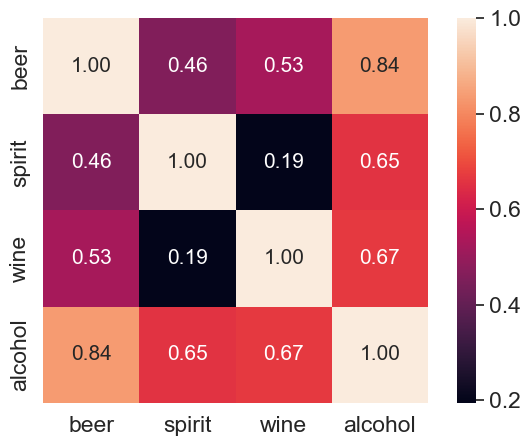

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# 그래프 출력을 위한 cols 이름을 축약합니다.
cols_view=['beer','spirit','wine','alcohol'] 
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
    cbar= True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size':15},
    yticklabels=cols_view,
    xticklabels=cols_view)

plt.tight_layout()
plt.show()

### [시각화 라이브러리를 이용한 피처간의 산점도 그래프를 출력합니다]

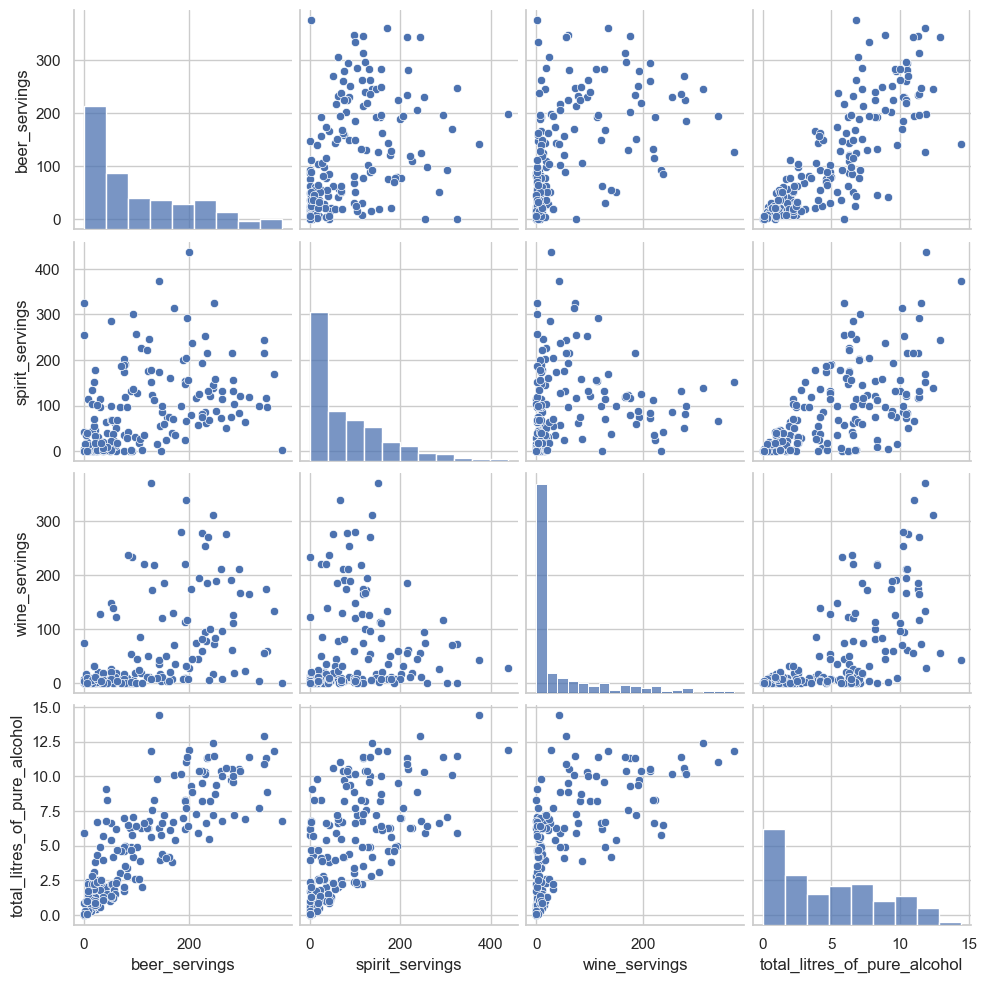

In [7]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid',context='notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']],height=2.5)

plt.show()

-----

# <Step3. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색

### [결측 데이터 전처리]
- continent column에 대한 결측 데이터 처리 과정

In [8]:
print(drinks.isnull().sum())
print("------------------------------------")
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
------------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [9]:
# 결측데이터를 처리합니다 : 정보가 없는 국가를 'Others', 줄여서 통합 -> 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')

In [10]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


##### 파이차트 시각화

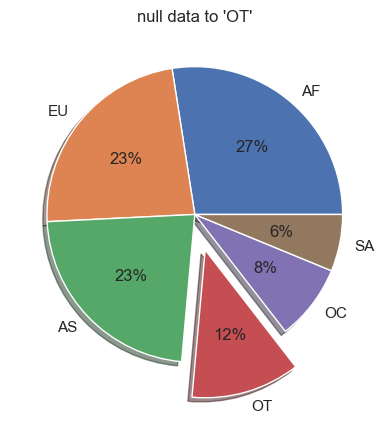

In [11]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()